In [1]:
#importing libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import re
import os

In [2]:
#reading in the data file without header to avoid duplicate columns being renamed automatically
df = pd.read_csv("clean_data/ethinicity_data_by_msoa_2.csv", header = None, low_memory=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,date,MSOA Name,MSOA Code,Rural Urban,All,White,Afghan,African/Arab,Albanian,Anglo Indian,...,Panjabi,Somali,Somalilander,Sri Lankan,Tamil,Thai,Turkish,Turkish,Vietnamese,Any other ethnic group
1,2011,Darlington 001,E02002559,Total,8842,8685,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,Darlington 002,E02002560,Total,5997,5916,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2011,Darlington 003,E02002561,Total,5741,5649,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,Darlington 004,E02002562,Total,6066,5927,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
#assigining top row as head
new_header = df.iloc[0] #grab the first row
df = df[1: ] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head()

,date,MSOA Name,MSOA Code,Rural Urban,All,White,Afghan,African/Arab,Albanian,Anglo Indian,...,Panjabi,Somali,Somalilander,Sri Lankan,Tamil,Thai,Turkish,Turkish,Vietnamese,Any other ethnic group
1,2011,Darlington 001,E02002559,Total,8842,8685,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,Darlington 002,E02002560,Total,5997,5916,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2011,Darlington 003,E02002561,Total,5741,5649,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,Darlington 004,E02002562,Total,6066,5927,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2011,Darlington 005,E02002563,Total,5463,5385,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [4]:
#selecting london data nased on MSOA code
ldnData = pd.read_csv("clean_data/msoa-data-london.csv", low_memory=False)
dfLnd = pd.merge (df, ldnData, how='right',on=["MSOA Code","MSOA Name"])
dfLnd.dropna(axis = 0, inplace = True)
dfLnd

,date,MSOA Name,MSOA Code,Rural Urban,All,White,Afghan,African/Arab,Albanian,Anglo Indian,...,Panjabi,Somali,Somalilander,Sri Lankan,Tamil,Thai,Turkish,Turkish,Vietnamese,Any other ethnic group
0,2011,City of London 001,E02000001,Total,7375,5990,0,0,0,1,...,0,0,0,0,0,0,0,0,3,16
1,2011,Barking and Dagenham 001,E02000002,Total,6775,4670,0,0,0,1,...,0,5,0,0,0,0,2,2,0,24
2,2011,Barking and Dagenham 002,E02000003,Total,10045,5824,0,0,0,1,...,0,1,0,0,2,0,17,20,0,94
3,2011,Barking and Dagenham 003,E02000004,Total,6182,5134,0,0,0,0,...,0,0,0,0,0,0,6,0,0,3
4,2011,Barking and Dagenham 004,E02000005,Total,8562,5910,0,0,0,0,...,0,0,0,0,0,1,4,4,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,2011,Westminster 020,E02000979,Total,8081,6201,0,0,0,1,...,0,2,0,0,0,0,11,1,0,44
979,2011,Westminster 021,E02000980,Total,8684,6207,0,0,0,1,...,0,2,0,0,0,0,9,2,0,22
980,2011,Westminster 022,E02000981,Total,8991,7325,0,0,0,1,...,0,0,0,0,0,1,1,2,2,21
981,2011,Westminster 023,E02000982,Total,8226,5563,0,0,0,0,...,0,2,0,0,0,0,11,0,0,23


In [5]:
#combining duplicate column data as a sum
df1 = dfLnd.groupby(dfLnd.columns, axis=1).agg(np.max)
df1

,Afghan,African,African American,African/Arab,Albanian,All,Anglo Indian,Any other ethnic group,Arab,Asian,...,Sri Lankan,Taiwanese,Tamil,Thai,Turkish,Venezuelan,Vietnamese,Western European,White,date
0,8,98,4,1,0,7375,1,43,69,0,...,15,0,2,17,1,0,3,2,5990,2011
1,8,709,0,0,0,6775,1,41,35,0,...,24,0,10,11,3,0,0,4,4670,2011
2,21,936,2,4,1,10045,7,94,32,0,...,91,0,2,13,3,0,1,2,5824,2011
3,6,464,0,0,0,6182,0,7,6,0,...,16,0,1,12,6,0,1,6,5134,2011
4,16,1017,0,0,1,8562,3,52,20,0,...,50,0,0,3,4,0,4,8,5910,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,12,326,2,3,0,8081,1,61,228,0,...,10,2,0,12,11,0,9,9,6201,2011
979,23,473,1,5,0,8684,4,50,277,0,...,12,0,2,18,9,0,10,6,6207,2011
980,23,248,4,3,0,8991,1,66,175,0,...,12,4,1,13,2,0,5,7,7325,2011
981,9,472,9,3,3,8226,0,68,408,0,...,17,1,0,12,11,0,3,7,5563,2011


In [6]:
#cleaning dataframe
df1.drop(columns=["date","Rural Urban"],inplace = True)#removing date column
df1.columns #checking colum names

Index(['Afghan', 'African', 'African American', 'African/Arab', 'Albanian',
       'All', 'Anglo Indian', 'Any other ethnic group', 'Arab', 'Asian',
       'Australian/New Zealander', 'Baltic States', 'Bangladeshi', 'Black',
       'Bosnian', 'Brazilian', 'British Asian', 'Burmese', 'Cambodia',
       'Caribbean', 'Caribbean Asian', 'Chilean', 'Chinese', 'Colombian',
       'Cuban', 'Cypriot', 'East African Asian', 'Eastern European',
       'Ecuadorian', 'European Mixed', 'Filipino', 'Greek', 'Greek Cypriot',
       'Indian', 'Indonesian', 'Iranian', 'Israeli', 'Italian', 'Japanese',
       'Kashmiri', 'Korean', 'Kosovan', 'Kurdish',
       'Latin/South/Central American', 'MSOA Code', 'MSOA Name', 'Malaysian',
       'Mexican', 'Middle East', 'Moroccan', 'Multi-ethnic islands',
       'Nepalese', 'Nigerian', 'North African', 'North American', 'Pakistani',
       'Panjabi', 'Peruvian', 'Polish', 'Polynesia/Micronesia/Melanesia',
       'Russia', 'Russian', 'Sinhalese', 'Somali', 'Somal

In [7]:
#cleaning column names
df1.columns = df1.columns.str.replace(' ', '_') #replacing spcae with underscore
df1.columns = df1.columns.str.replace('/', '_') #replacing spcae with underscore#

In [8]:
#arranging columns
dfA = df1[['MSOA_Code','MSOA_Name','All','White']]
dfB = df1[df1.columns.drop(dfA.columns.tolist())]
dfEth = pd.concat([dfA, dfB], axis=1, join="outer")
dfEth

,MSOA_Code,MSOA_Name,All,White,Afghan,African,African_American,African_Arab,Albanian,Anglo_Indian,...,Somalilander,South_Asian_and_Chinese,Sri_Lankan,Taiwanese,Tamil,Thai,Turkish,Venezuelan,Vietnamese,Western_European
0,E02000001,City of London 001,7375,5990,8,98,4,1,0,1,...,0,1,15,0,2,17,1,0,3,2
1,E02000002,Barking and Dagenham 001,6775,4670,8,709,0,0,0,1,...,2,0,24,0,10,11,3,0,0,4
2,E02000003,Barking and Dagenham 002,10045,5824,21,936,2,4,1,7,...,0,0,91,0,2,13,3,0,1,2
3,E02000004,Barking and Dagenham 003,6182,5134,6,464,0,0,0,0,...,0,0,16,0,1,12,6,0,1,6
4,E02000005,Barking and Dagenham 004,8562,5910,16,1017,0,0,1,3,...,0,0,50,0,0,3,4,0,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,Westminster 020,8081,6201,12,326,2,3,0,1,...,0,0,10,2,0,12,11,0,9,9
979,E02000980,Westminster 021,8684,6207,23,473,1,5,0,4,...,0,0,12,0,2,18,9,0,10,6
980,E02000981,Westminster 022,8991,7325,23,248,4,3,0,1,...,0,3,12,4,1,13,2,0,5,7
981,E02000982,Westminster 023,8226,5563,9,472,9,3,3,0,...,0,0,17,1,0,12,11,0,3,7


In [9]:
#Range Normalisation
cols = dfEth.columns.tolist()
dfResc = dfEth[cols[2:]].copy() #new dataframe to rescale and converting all count to int

from sklearn.preprocessing import MinMaxScaler #importing rescale class
cols = dfResc.columns.tolist() #creating list of columns to be rescaled

scalers = [MinMaxScaler(feature_range=(0, 1)).
           fit(dfResc[x].values.reshape(-1,1)) 
           for x in cols] #loop rescaling values between 0 to 1 and fitting data

dfResc1 = dfResc.copy()
for i in range(0, len(cols)):
    dfResc1[cols[i]] = scalers[i].transform(dfResc[cols[i]].values.reshape(-1,1)) #loop for transforming
    
dfStan1 = pd.concat([dfEth[['MSOA_Code','MSOA_Name']], dfResc1], axis=1, join="outer")
dfStan1

,MSOA_Code,MSOA_Name,All,White,Afghan,African,African_American,African_Arab,Albanian,Anglo_Indian,...,Somalilander,South_Asian_and_Chinese,Sri_Lankan,Taiwanese,Tamil,Thai,Turkish,Venezuelan,Vietnamese,Western_European
0,E02000001,City of London 001,0.229785,0.500440,0.013180,0.015446,0.111111,0.023256,0.000000,0.03125,...,0.000000,0.125,0.015723,0.000000,0.00738,0.2125,0.010309,0.0,0.015873,0.032258
1,E02000002,Barking and Dagenham 001,0.166859,0.371370,0.013180,0.142976,0.000000,0.000000,0.000000,0.03125,...,0.038462,0.000,0.025157,0.000000,0.03690,0.1375,0.030928,0.0,0.000000,0.064516
2,E02000003,Barking and Dagenham 002,0.509806,0.484208,0.034596,0.190357,0.055556,0.093023,0.052632,0.21875,...,0.000000,0.000,0.095388,0.000000,0.00738,0.1625,0.030928,0.0,0.005291,0.032258
3,E02000004,Barking and Dagenham 003,0.104667,0.416740,0.009885,0.091839,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000,0.016771,0.000000,0.00369,0.1500,0.061856,0.0,0.005291,0.096774
4,E02000005,Barking and Dagenham 004,0.354274,0.492618,0.026359,0.207264,0.000000,0.000000,0.052632,0.09375,...,0.000000,0.000,0.052411,0.000000,0.00000,0.0375,0.041237,0.0,0.021164,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,Westminster 020,0.303828,0.521072,0.019769,0.063035,0.055556,0.069767,0.000000,0.03125,...,0.000000,0.000,0.010482,0.105263,0.00000,0.1500,0.113402,0.0,0.047619,0.145161
979,E02000980,Westminster 021,0.367069,0.521658,0.037891,0.093717,0.027778,0.116279,0.000000,0.12500,...,0.000000,0.000,0.012579,0.000000,0.00738,0.2250,0.092784,0.0,0.052910,0.096774
980,E02000981,Westminster 022,0.399266,0.630977,0.037891,0.046754,0.111111,0.069767,0.000000,0.03125,...,0.000000,0.375,0.012579,0.210526,0.00369,0.1625,0.020619,0.0,0.026455,0.112903
981,E02000982,Westminster 023,0.319035,0.458688,0.014827,0.093509,0.250000,0.069767,0.157895,0.00000,...,0.000000,0.000,0.017820,0.052632,0.00000,0.1500,0.113402,0.0,0.015873,0.112903


In [10]:
#inter-Quartile Standardisation
from sklearn.preprocessing import RobustScaler
rs = RobustScaler(quantile_range=(25.0, 75.0))

scalers = [rs.fit(dfResc[x].values.reshape(-1,1)) 
           for x in cols] #loop rescaling values between 0 to 1 and fitting data

dfResc2 = dfResc.copy()
for i in range(0, len(cols)):
    dfResc2[cols[i]] = rs.transform(dfResc[cols[i]].values.reshape(-1,1)) #loop for transforming

dfStan2 = pd.concat([dfEth[['MSOA_Code','MSOA_Name']], dfResc2], axis=1, join="outer")
dfStan2

,MSOA_Code,MSOA_Name,All,White,Afghan,African,African_American,African_Arab,Albanian,Anglo_Indian,...,Somalilander,South_Asian_and_Chinese,Sri_Lankan,Taiwanese,Tamil,Thai,Turkish,Venezuelan,Vietnamese,Western_European
0,E02000001,City of London 001,2457.000000,1995.333333,1.333333,31.333333,0.000000,-1.000000,-1.333333,-1.000000,...,-1.333333,-1.000000,3.666667,-1.333333,-0.666667,4.333333,-1.000000,-1.333333,-0.333333,-0.666667
1,E02000002,Barking and Dagenham 001,2257.000000,1555.333333,1.333333,235.000000,-1.333333,-1.333333,-1.333333,-1.000000,...,-0.666667,-1.333333,6.666667,-1.333333,2.000000,2.333333,-0.333333,-1.333333,-1.333333,0.000000
2,E02000003,Barking and Dagenham 002,3347.000000,1940.000000,5.666667,310.666667,-0.666667,0.000000,-1.000000,1.000000,...,-1.333333,-1.333333,29.000000,-1.333333,-0.666667,3.000000,-0.333333,-1.333333,-1.000000,-0.666667
3,E02000004,Barking and Dagenham 003,2059.333333,1710.000000,0.666667,153.333333,-1.333333,-1.333333,-1.333333,-1.333333,...,-1.333333,-1.333333,4.000000,-1.333333,-1.000000,2.666667,0.666667,-1.333333,-1.000000,0.666667
4,E02000005,Barking and Dagenham 004,2852.666667,1968.666667,4.000000,337.666667,-1.333333,-1.333333,-1.000000,-0.333333,...,-1.333333,-1.333333,15.333333,-1.333333,-1.333333,-0.333333,0.000000,-1.333333,0.000000,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,Westminster 020,2692.333333,2065.666667,2.666667,107.333333,-0.666667,-0.333333,-1.333333,-1.000000,...,-1.333333,-1.333333,2.000000,-0.666667,-1.333333,2.666667,2.333333,-1.333333,1.666667,1.666667
979,E02000980,Westminster 021,2893.333333,2067.666667,6.333333,156.333333,-1.000000,0.333333,-1.333333,0.000000,...,-1.333333,-1.333333,2.666667,-1.333333,-0.666667,4.666667,1.666667,-1.333333,2.000000,0.666667
980,E02000981,Westminster 022,2995.666667,2440.333333,6.333333,81.333333,0.000000,-0.333333,-1.333333,-1.000000,...,-1.333333,-0.333333,2.666667,0.000000,-1.000000,3.000000,-0.666667,-1.333333,0.333333,1.000000
981,E02000982,Westminster 023,2740.666667,1853.000000,1.666667,156.000000,1.666667,-0.333333,-0.333333,-1.333333,...,-1.333333,-1.333333,4.333333,-1.000000,-1.333333,2.666667,2.333333,-1.333333,-0.333333,1.000000


In [11]:
#Per 100,000 standardisation
dfResc_int = dfResc.copy().astype(int)
dfResc3 = dfResc.copy()
for column in dfResc3:
    dfResc3[column] = dfResc_int[column].values*(100000/dfResc_int['All']).round(2).copy()

dfStan3 = pd.concat([dfEth[['MSOA_Code','MSOA_Name']], dfResc3], axis=1, join="outer")
dfStan3

,MSOA_Code,MSOA_Name,All,White,Afghan,African,African_American,African_Arab,Albanian,Anglo_Indian,...,Somalilander,South_Asian_and_Chinese,Sri_Lankan,Taiwanese,Tamil,Thai,Turkish,Venezuelan,Vietnamese,Western_European
0,E02000001,City of London 001,100005.00,81224.40,108.48,1328.88,54.24,13.56,0.00,13.56,...,0.00,13.56,203.40,0.00,27.12,230.52,13.56,0.0,40.68,27.12
1,E02000002,Barking and Dagenham 001,99999.00,68929.20,118.08,10464.84,0.00,0.00,0.00,14.76,...,29.52,0.00,354.24,0.00,147.60,162.36,44.28,0.0,0.00,59.04
2,E02000003,Barking and Dagenham 002,100048.20,58007.04,209.16,9322.56,19.92,39.84,9.96,69.72,...,0.00,0.00,906.36,0.00,19.92,129.48,29.88,0.0,9.96,19.92
3,E02000004,Barking and Dagenham 003,100024.76,83068.12,97.08,7507.52,0.00,0.00,0.00,0.00,...,0.00,0.00,258.88,0.00,16.18,194.16,97.08,0.0,16.18,97.08
4,E02000005,Barking and Dagenham 004,100004.16,69028.80,186.88,11878.56,0.00,0.00,11.68,35.04,...,0.00,0.00,584.00,0.00,0.00,35.04,46.72,0.0,46.72,93.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,Westminster 020,99961.97,76706.37,148.44,4032.62,24.74,37.11,0.00,12.37,...,0.00,0.00,123.70,24.74,0.00,148.44,136.07,0.0,111.33,111.33
979,E02000980,Westminster 021,100039.68,71504.64,264.96,5448.96,11.52,57.60,0.00,46.08,...,0.00,0.00,138.24,0.00,23.04,207.36,103.68,0.0,115.20,69.12
980,E02000981,Westminster 022,99979.92,81454.00,255.76,2757.76,44.48,33.36,0.00,11.12,...,0.00,33.36,133.44,44.48,11.12,144.56,22.24,0.0,55.60,77.84
981,E02000982,Westminster 023,100028.16,67646.08,109.44,5739.52,109.44,36.48,36.48,0.00,...,0.00,0.00,206.72,12.16,0.00,145.92,133.76,0.0,36.48,85.12


In [12]:
#Log(1+x) trsansformation to normalise data with zero count
dfResc4 = dfResc.copy()
for column in dfResc4:
    dfResc4[column] = np.log1p(dfResc3[column].values)

dfStan4 = pd.concat([dfEth[['MSOA_Code','MSOA_Name']], dfResc4], axis=1, join="outer")
dfStan4

,MSOA_Code,MSOA_Name,All,White,Afghan,African,African_American,African_Arab,Albanian,Anglo_Indian,...,Somalilander,South_Asian_and_Chinese,Sri_Lankan,Taiwanese,Tamil,Thai,Turkish,Venezuelan,Vietnamese,Western_European
0,E02000001,City of London 001,11.512985,11.304983,4.695742,7.192844,4.011687,2.678278,0.000000,2.678278,...,0.000000,2.678278,5.320079,0.000000,3.336481,5.444666,2.678278,0.0,3.730021,3.336481
1,E02000002,Barking and Dagenham 001,11.512925,11.140850,4.779796,9.255872,0.000000,0.000000,0.000000,2.757475,...,3.418382,0.000000,5.872794,0.000000,5.001258,5.095956,3.812865,0.0,0.000000,4.095011
2,E02000003,Barking and Dagenham 002,11.513417,10.968337,5.347869,9.140300,3.040706,3.709662,2.394252,4.258728,...,0.000000,0.000000,6.810539,0.000000,3.040706,4.871220,3.430109,0.0,2.394252,3.040706
3,E02000004,Barking and Dagenham 003,11.513183,11.327428,4.585783,8.923794,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.560220,0.000000,2.843746,5.273820,4.585783,0.0,2.843746,4.585783
4,E02000005,Barking and Dagenham 004,11.512977,11.142294,5.235803,9.382575,0.000000,0.000000,2.540026,3.584629,...,0.000000,0.000000,6.371612,0.000000,0.000000,3.584629,3.865351,0.0,3.865351,4.547965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,Westminster 020,11.512555,11.247753,5.006895,8.302420,3.248046,3.640477,0.000000,2.593013,...,0.000000,0.000000,4.825911,3.248046,0.000000,5.006895,4.920492,0.0,4.721441,4.721441
979,E02000980,Westminster 021,11.513332,11.177532,5.583346,8.603364,2.527327,4.070735,0.000000,3.851848,...,0.000000,0.000000,4.936199,0.000000,3.179719,5.339267,4.650908,0.0,4.755313,4.250208
980,E02000981,Westminster 022,11.512735,11.307806,5.548142,7.922537,3.817273,3.536893,0.000000,2.494857,...,0.000000,3.536893,4.901118,3.817273,2.494857,4.980588,3.145875,0.0,4.036009,4.367420
981,E02000982,Westminster 023,11.513217,11.122059,4.704472,8.655305,4.704472,3.623807,3.623807,0.000000,...,0.000000,0.000000,5.336191,2.577182,0.000000,4.989888,4.903495,0.0,3.623807,4.455742


In [13]:
#yeo-johnson power-trsansformation to normalise data with zero count
dfResc5 = dfResc.copy()
from sklearn.preprocessing import power_transform

for i in range(0, len(cols)):
    dfResc5[cols[i]] = power_transform(dfResc[cols[i]].values.reshape(-1,1)) #loop for transforming


dfStan5 = pd.concat([dfEth[['MSOA_Code','MSOA_Name']], dfResc5], axis=1, join="outer")
dfStan5

,MSOA_Code,MSOA_Name,All,White,Afghan,African,African_American,African_Arab,Albanian,Anglo_Indian,...,Somalilander,South_Asian_and_Chinese,Sri_Lankan,Taiwanese,Tamil,Thai,Turkish,Venezuelan,Vietnamese,Western_European
0,E02000001,City of London 001,-0.604039,0.428517,-0.114312,-1.396607,1.222583,0.489433,-0.498835,-0.535919,...,-0.787152,1.891515,-0.510547,-0.646517,-0.500890,1.177444,-1.622099,-0.203257,-0.560791,-0.955906
1,E02000002,Barking and Dagenham 001,-1.168495,-0.373064,-0.114312,0.592390,-1.054532,-0.895543,-0.498835,-0.535919,...,0.883419,-0.519543,-0.159913,-0.646517,0.513409,0.680485,-0.572837,-0.203257,-1.829062,-0.025554
2,E02000003,Barking and Dagenham 002,1.201599,0.327086,0.572157,0.918548,0.719326,1.370073,1.934321,1.510018,...,-0.787152,-0.519543,0.823471,-0.646517,-0.500890,0.869438,-0.572837,-0.203257,-1.191198,-0.955906
3,E02000004,Barking and Dagenham 003,-1.814673,-0.092647,-0.313145,0.118291,-1.054532,-0.895543,-0.498835,-1.536215,...,-0.787152,-0.519543,-0.462492,-0.646517,-0.858571,0.778601,0.155628,-0.203257,-1.191198,0.630296
4,E02000005,Barking and Dagenham 004,0.314492,0.379613,0.377404,1.018479,-1.054532,-0.895543,1.934321,0.479417,...,-0.787152,-0.519543,0.385493,-0.646517,-1.520892,-0.666796,-0.270574,-0.203257,-0.359418,1.143805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,Westminster 020,-0.030578,0.557682,0.171977,-0.255509,0.719326,1.218743,-0.498835,-0.535919,...,-0.787152,-0.519543,-0.810549,1.608467,-1.520892,0.778601,0.770462,-0.203257,0.261263,1.365330
979,E02000980,Westminster 021,0.396928,0.561359,0.637294,0.139171,0.195064,1.472510,-0.498835,0.809519,...,-0.787152,-0.519543,-0.676156,-0.646517,-0.500890,1.243700,0.571335,-0.203257,0.346040,0.630296
980,E02000981,Westminster 022,0.596088,1.249932,0.637294,-0.532593,1.222583,1.218743,-0.498835,-0.535919,...,-0.787152,1.983385,-0.676156,1.742412,-0.858571,0.869438,-0.987218,-0.203257,-0.195449,0.900558
981,E02000982,Westminster 023,0.076980,0.167953,-0.031724,0.136868,1.700979,1.218743,2.069390,-1.536215,...,-0.787152,-0.519543,-0.417307,1.308377,-1.520892,0.778601,0.770462,-0.203257,-0.560791,0.900558


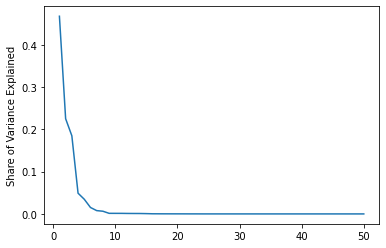

In [70]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=50, whiten=True) 
gdf = dfResc2.drop(['All', 'White'], axis = 1)
pca.fit(gdf)

explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

x = np.arange(1,len(explained_variance)+1)
plt.plot(x, explained_variance)
plt.ylabel('Share of Variance Explained')
plt.show()

In [71]:
for i in range(0, 20):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 46.74% of variance
Component  1 accounts for 22.51% of variance
Component  2 accounts for 18.48% of variance
Component  3 accounts for 4.90% of variance
Component  4 accounts for 3.47% of variance
Component  5 accounts for 1.52% of variance
Component  6 accounts for 0.78% of variance
Component  7 accounts for 0.64% of variance
Component  8 accounts for 0.14% of variance
Component  9 accounts for 0.13% of variance
Component 10 accounts for 0.13% of variance
Component 11 accounts for 0.11% of variance
Component 12 accounts for 0.10% of variance
Component 13 accounts for 0.10% of variance
Component 14 accounts for 0.07% of variance
Component 15 accounts for 0.03% of variance
Component 16 accounts for 0.03% of variance
Component 17 accounts for 0.02% of variance
Component 18 accounts for 0.02% of variance
Component 19 accounts for 0.02% of variance


In [58]:
keep_n_components = 10
pca = PCA(n_components=keep_n_components, whiten=True)

gdf_pca = pca.fit_transform(gdf)
for i in range(0, keep_n_components):
    print(f"Component {i:>2} accounts for {pca.explained_variance_ratio_[i]*100:>2.2f}% of variance")

Component  0 accounts for 46.74% of variance
Component  1 accounts for 22.51% of variance
Component  2 accounts for 18.48% of variance
Component  3 accounts for 4.90% of variance
Component  4 accounts for 3.47% of variance
Component  5 accounts for 1.52% of variance
Component  6 accounts for 0.78% of variance
Component  7 accounts for 0.64% of variance
Component  8 accounts for 0.14% of variance
Component  9 accounts for 0.13% of variance


In [69]:
gdf_pca = gdf_pca.T
eth_pca = pd.DataFrame()
for i in range (0, keep_n_components):
    eth_pca[f"Component_{i+1}"] = gdf_pca[i]
eth_pca

,Component_1,Component_2,Component_3,Component_4,Component_5,Component_6,Component_7,Component_8,Component_9,Component_10
0,-0.408918,-1.009099,0.250877,-0.269569,0.166421,0.065291,0.117008,1.972617,0.192104,-0.218007
1,-0.357415,0.102620,-0.121910,-0.028453,0.450118,-0.477995,-0.280125,-0.234853,-0.649350,0.906673
2,0.392199,0.818710,0.350485,0.531266,0.323587,-0.582946,-0.130122,0.139411,-0.495494,0.908656
3,-0.638364,-0.453345,-0.155472,-0.152390,0.546763,-0.612435,-0.177779,-0.270296,-0.161931,-0.254329
4,-0.318687,0.612563,0.009724,-0.229718,0.979513,-0.626183,-0.042993,-0.430890,-0.506234,0.979026
...,...,...,...,...,...,...,...,...,...,...
978,-0.479882,-0.677903,-0.085055,-0.172538,0.455490,0.864166,-0.332069,-0.870793,0.443056,-0.375043
979,-0.414542,-0.345049,0.322822,-0.336568,0.452712,1.104900,-0.315912,-0.989853,0.209697,-0.354075
980,-0.491789,-0.770615,-0.019541,-0.034021,0.264236,0.501160,-0.339301,-0.726450,0.464231,-0.095038
981,-0.483914,-0.318862,0.328227,-0.115716,0.441827,1.985130,-0.230597,-1.175989,0.017814,-0.419403
